In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. 图像文件读入、显示、保存
### Goals

- Here, you will learn how to read an image, how to display it and how to save it back
- You will learn these functions : cv2.imread(), cv2.imshow() , cv2.imwrite()
- Optionally, you will learn how to display images with Matplotlib

### Read an image(文件路径不能含有中文！！！)

Use the function cv2.imread() to read an image. The image should be in the working directory or a full path of image should be given.

Second argument is a flag which specifies the way image should be read.

- cv2.IMREAD_COLOR : Loads a color image. Any transparency of image will be neglected. It is the default flag.
- cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode
- cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel

Note: Instead of these three flags, you can simply pass integers 1, 0 or -1 respectively.

Warning: Even if the image path is wrong, it won’t throw any error, but print img will give you None

### Display an image

Use the function cv2.imshow() to display an image in a window. The window automatically fits to the image size.

First argument is a window name which is a string. second argument is our image. You can create as many windows as you wish, but with different window names.

### Write an image

Use the function cv2.imwrite() to save an image.

First argument is the file name, second argument is the image you want to save.

In [33]:
def read_image(path, mode, win_name):
    # path 图像路径
    # mode 读取方式
    img = cv2.imread(path, mode)
    cv2.imshow(win_name, img)
    cv2.waitKey(0) # 参数为窗口等待的毫秒数，当值为0代表无限期等待（需要手动关闭）
    cv2.destroyAllWindows()

In [30]:
path = "./imgs/lena.jpg"
for i in range(-1, 2):
    read_image(path, i, str(i))

### Using Matplotlib 

#### 注意：Extracting a region from an image using slicing in Python, OpenCV - Stack Overflow https://stackoverflow.com/questions/15072736/extracting-a-region-from-an-image-using-slicing-in-python-opencv/15074748#15074748
- OpenCV加载的彩色图像处于BGR模式。 但Matplotlib以RGB模式显示。 因此，如果使用OpenCV读取图像，则Matplotlib中的彩色图像将无法正确显示。 
- cv2.imread读取出来的图像格式是BGR，用matplot显示的时候需要转化为RGB!!!

```
# Method_1
import cv2
img_bgr = cv2.imread(img_path)
img_rgb = img[:, :, ::-1]

# Method_2
img_bgr = cv2.imread(path,1)
img_rgb = img_bgr[..., ::-1]

# Method_3
img_bgr = cv2.imread(path,1)
b, g, r = cv2.split(img)
img_rgb = cv2.merge([r, g, b])

# Method_4
img_bgr = cv2.imread(path,1)
b, g, r = cv2.split(img)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
```

Matplotlib is a plotting library for Python which gives you wide variety of plotting methods. You will see them in coming articles. Here, you will learn how to display image with Matplotlib. You can zoom images, save it etc using Matplotlib.

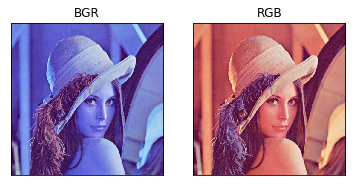

In [23]:
img_bgr = cv2.imread(path,1)
b, g, r = cv2.split(img_bgr)
img_rgb = cv2.merge([r, g, b])

plt.subplot(121)
plt.imshow(img_bgr)  # expects distorted color
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.title("BGR")

plt.subplot(122)
plt.imshow(img_rgb)  # expects true color
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.title("RGB")

plt.show()

cv2.imshow('bgr image',img_bgr) # expects true color
cv2.imshow('rgb image',img_rgb) # expects distorted color
cv2.waitKey(0)
cv2.destroyAllWindows()
